In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as scp

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.lines as mlines
import matplotlib.animation as animation
import matplotlib.patches as patches
import matplotlib as mpl
import csv
from tqdm import notebook
import cmath
import json

from JSONHelpers import TypeEncoder, as_complex

#Define Constants
e = 1.6e-19 #C - charge on electron
m_e = 9.1094e-31 #kg - mass of electron
al = m_e/e #used in matrix
alin = 1/al
mu_0 = 4e-7*np.pi #H/m - permeability of free space
ep_0 = 8.854e-12 #F/m - permitivity of free space
c = 3e8 #m/s - speed of light

In [3]:
directory = './SetupOG_ReducedRange'
filterName = 'FilterA'
thetadegsList = np.arange(0,40,2)

In [6]:
neg_evals_BigList = []
neg_Eavg_BigList = []
neg_Estd_BigList = []
neg_Emax_BigList = []

pos_evals_BigList = []
pos_Eavg_BigList = []
pos_Estd_BigList = []
pos_Emax_BigList = []

for thetadegs in thetadegsList:
    filename =  f'{directory}/{thetadegs}deg_{filterName}.json'
    with open(filename, 'r') as f:
        jsondata = json.load(f, object_hook=as_complex)
    
    if jsondata['thetadegs'] != thetadegs:
        raise Exception('thetadegs mismatch')

    neg_evals_BigList.append(np.asarray(jsondata['wgNeg_evalList']).real)
    neg_Eavg_BigList.append(np.asarray(jsondata['wgNeg_EavgList']))
    neg_Estd_BigList.append(np.asarray(jsondata['wgNeg_EstdList']))
    neg_Emax_BigList.append(np.asarray(jsondata['wgNeg_EmaxList']))

    pos_evals_BigList.append(np.asarray(jsondata['wgPos_evalList']).real)
    pos_Eavg_BigList.append(np.asarray(jsondata['wgPos_EavgList']))
    pos_Estd_BigList.append(np.asarray(jsondata['wgPos_EstdList']))
    pos_Emax_BigList.append(np.asarray(jsondata['wgPos_EmaxList']))

wp0 = jsondata['wp0']

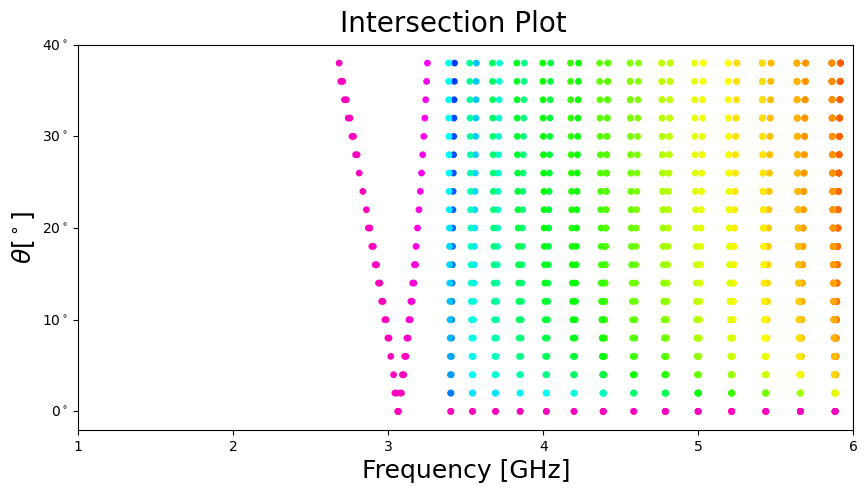

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
fig.suptitle('Intersection Plot', y=.95, size=20)

wgNorm = plt.Normalize(.001, .01)
wgCmap = 'gist_rainbow'

for n in range(len(thetadegsList)):
    posScatter = ax.scatter(pos_evals_BigList[n]/(2*np.pi*1e9), [thetadegsList[n] for i in pos_evals_BigList[n]], s=15,
                            c=pos_Estd_BigList[n], norm=wgNorm, cmap=wgCmap)
    negScatter = ax.scatter(neg_evals_BigList[n]/(2*np.pi*1e9), [thetadegsList[n] for i in neg_evals_BigList[n]], s=15,
                            c=neg_Estd_BigList[n], norm=wgNorm, cmap=wgCmap)


plt.ylim([-2, 40])
plt.xlim([1,6])
yticks = [0, 10, 20, 30, 40]
ylabels = [r'$0^\circ$',r'$10^\circ$',r'$20^\circ$',r'$30^\circ$',r'$40^\circ$']
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels)
plt.xlabel(r'Frequency [GHz]', size=18)
plt.ylabel(r'$\theta [^\circ]$', size=18)
plt.show()